In [1]:
!pip install nltk
!pip install seaborn

In [2]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk

In [3]:
tweets_df = pd.read_csv('/home/jovyan/twitter_sentiment_train.csv')
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [7]:
tweets_df=tweets_df.drop(['id'],axis=1)
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

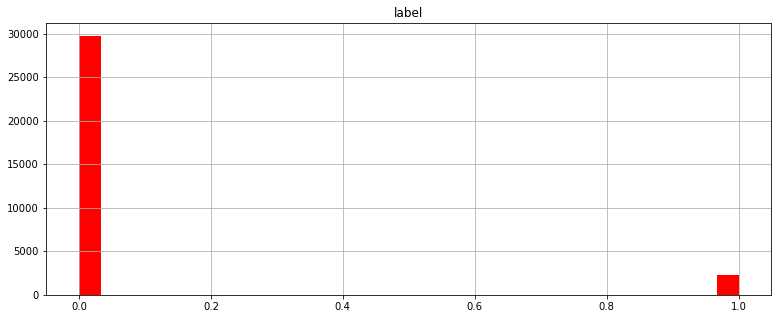

In [8]:
#explore dataset

tweets_df.hist(bins=30,figsize=(13,5),color='r')

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

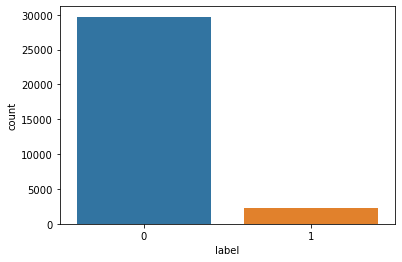

In [9]:
sns.countplot('label',data=tweets_df)

In [10]:
#Let's get the length of the messages

tweets_df['length']=tweets_df['tweet'].apply(len)


tweets_df


,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot:ylabel='Frequency'>

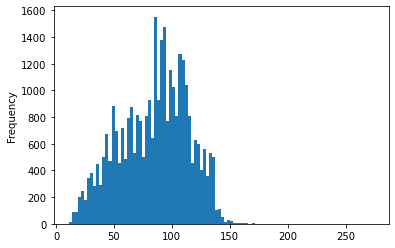

In [11]:
tweets_df['length'].plot(bins=100,kind='hist')

In [12]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [13]:
#Let's see the shortest message
tweets_df[tweets_df['length']==11]['tweet'].iloc[0]



'i love you '

In [14]:
#let's see the message with average length

tweets_df[tweets_df['length']==84]['tweet'].iloc[0]


'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [15]:
positive=tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [16]:
negative=tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [17]:
# plot the wordcloud
sentences=tweets_df['tweet'].tolist()
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [18]:
len(sentences)

31962

In [19]:
sentences_as_one_string = " ".join(sentences)

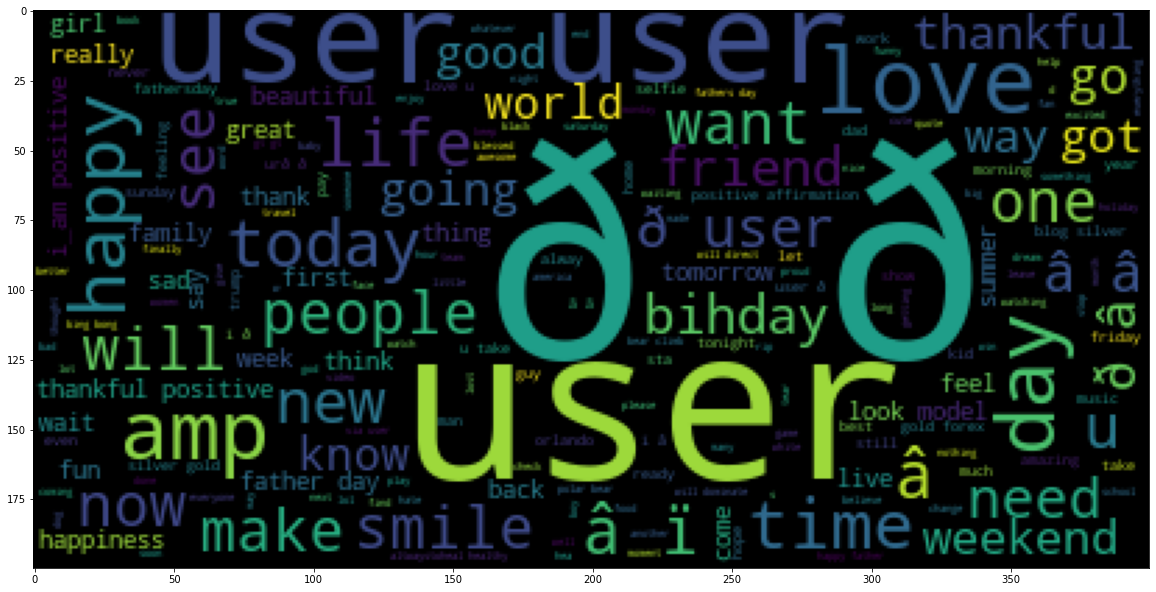

In [20]:
!pip install wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(20,30))
plt.imshow(WordCloud().generate(sentences_as_one_string))

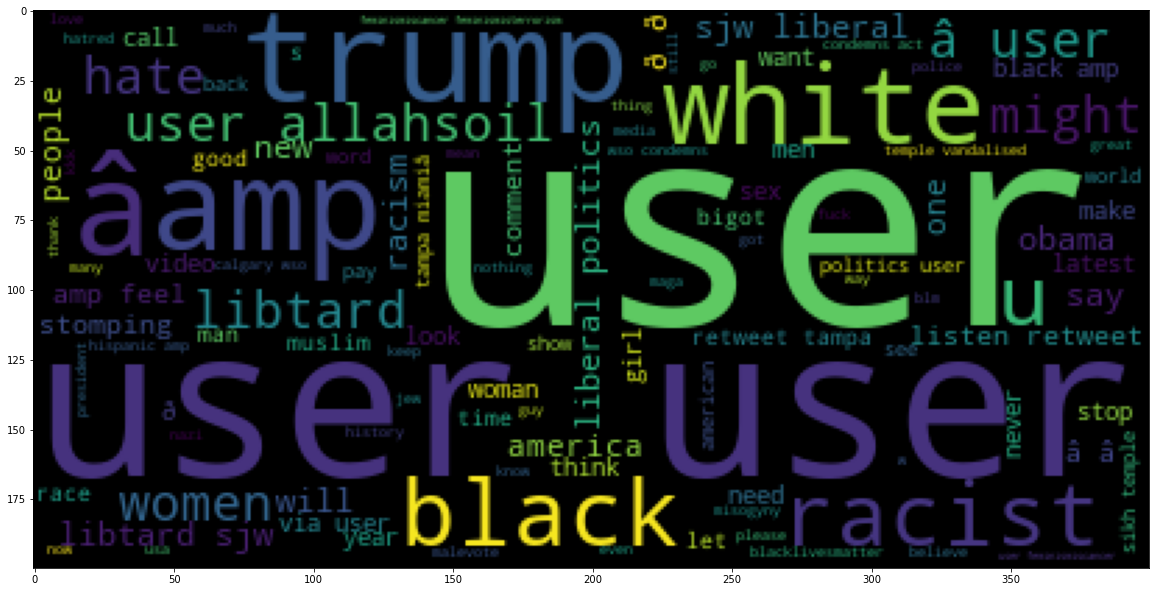

In [21]:
#plot the wordcloud of the 'negative ' dataframe

negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string=" ".join(negative_list)

plt.figure(figsize=(20,30))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

In [22]:
# performing data cleaning


import string
string.punctuation

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
#create a pipeline to remove punctuations,stopwords and perform count vectorization

def message_cleaning(message):
    test_punc_removed =[char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return  test_punc_removed_join_clean

In [24]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [25]:
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [26]:
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer =  CountVectorizer(analyzer = message_cleaning,dtype ='uint8').fit_transform(tweets_df['tweet']).toarray() 

In [28]:
tweets_countvectorizer.shape

(31962, 47386)

In [29]:
x = tweets_countvectorizer

In [30]:
y = tweets_df['label']

In [31]:
#train a naive bayes classifier model

x.shape

(31962, 47386)

In [32]:
y.shape

(31962,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier =  MultinomialNB()
NB_classifier.fit(x_train,y_train)

In [ ]:
#assess trained model performance

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_predict_test )
sns.heatmap(cm,annot = True)

In [ ]:
print(classification_report(y_test,y_predict_test))